<a href="https://colab.research.google.com/github/Renata1027/Mathematical-modeling/blob/main/4_%E5%9B%BE%E8%AE%BA_%E8%A7%84%E5%88%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.优化问题

## 1.1 数学原理

**优化问题 (Optimization Problem)** 在数学上可以抽象为以下核心要素：

1.  **决策变量 (Decision Variables):**  
    需要做出选择的未知量。通常用向量表示，记为 $\mathbf{x} = (x_1, x_2, \dots, x_n)$。  
    *例如：生产量、投资额、路径选择。*

2.  **目标函数 (Objective Function):**  
    衡量解决方案“好坏”的函数，需 **最大化** 或 **最小化**。记为 $f(\mathbf{x})$。  
    *例如：利润 $f(\mathbf{x}) = \sum c_i x_i$（最大化），成本 $f(\mathbf{x}) = \|\mathbf{Ax} - \mathbf{b}\|^2$（最小化）。*

3.  **约束条件 (Constraints):**  
    定义决策变量的可行范围，分为：  
    - **等式约束**：$g_i(\mathbf{x}) = 0 \quad (i=1,\dots,m)$  
    - **不等式约束**：$h_j(\mathbf{x}) \leq 0 \quad (j=1,\dots,p)$  
    *例如：资源限制 $\sum a_{ij}x_j \leq b_i$，非负性 $x_k \geq 0$。*

4.  **可行域 (Feasible Set):**  
    所有满足约束的 $\mathbf{x}$ 的集合：  
    $$
    \mathcal{S} = \{\mathbf{x} \mid g_i(\mathbf{x}) = 0, h_j(\mathbf{x}) \leq 0\}
    $$

5.  **最优解 (Optimal Solution):**  
    在 $\mathcal{S}$ 中使 $f(\mathbf{x})$ 取极值的解 $ \mathbf{x}^* $，对应的
    $ f( \mathbf{x}^* ) $ 称为 **最优值**。

**数学形式化表达：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & f(\mathbf{x}) \\
\text{s.t.} \quad & g_i(\mathbf{x}) = 0 \quad \forall i, \\
& h_j(\mathbf{x}) \leq 0 \quad \forall j.
\end{align*}
$$

**分类关键维度：**
- **目标函数**：线性（$f(\mathbf{x}) = \mathbf{c}^T\mathbf{x}$） vs. 非线性（如 $f(\mathbf{x}) = \mathbf{x}^T\mathbf{Qx}$）。
- **约束**：线性（$\mathbf{Ax} \leq \mathbf{b}$） vs. 非线性（如 $\|\mathbf{x}\| \leq 1$）。
- **变量类型**：连续 vs. 离散（如整数 $x_i \in \mathbb{Z}$）。
- **可行域性质**：凸集（$\forall \mathbf{x}, \mathbf{y} \in \mathcal{S}, \theta \mathbf{x} + (1-\theta)\mathbf{y} \in \mathcal{S}$） vs. 非凸。


## 1.2 算法内容


### 1.2.1 线性规划 (Linear Programming - LP)
**模型形式：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & \mathbf{c}^T\mathbf{x} \\
\text{s.t.} \quad & \mathbf{Ax} \leq \mathbf{b}, \\
& \mathbf{x} \geq 0.
\end{align*}
$$
**求解算法：**
- **单纯形法**：沿多面体顶点迭代，时间复杂度指数级但实际高效。
- **内点法**：多项式时间算法，适合大规模问题。

**几何解释**：可行域为凸多面体，最优解必在顶点处。


In [ ]:
"""
1. 线性规划 (Linear Programming, LP)
定义： 线性规划是一种优化技术，用于在由线性等式和不等式定义的区域中最大化或最小化线性目标函数。所有决策变量必须是连续的。

示例： 假设一家公司生产两种产品：产品 A 和产品 B。

生产产品 A 需要 2 小时机器时间和 1 小时人工时间。

生产产品 B 需要 1 小时机器时间和 3 小时人工时间。

每天可用的机器时间上限为 100 小时，人工时间上限为 120 小时。

产品 A 的利润为每单位 30 美元，产品 B 的利润为每单位 20 美元。
公司目标是最大化总利润。

代码实现： 我们将使用 scipy.optimize.linprog 来解决这个问题。
"""
from scipy.optimize import linprog

# 利润系数 (目标函数：最大化 30*x + 20*y，所以是 -30, -20)
c = [-30, -20]

# 不等式约束矩阵
# 2x + 1y <= 100 (机器时间)
# 1x + 3y <= 120 (人工时间)
A = [[2, 1],
     [1, 3]]

# 不等式约束右侧向量
b = [100, 120]

# 变量的边界 (x >= 0, y >= 0)
x0_bounds = (0, None)
x1_bounds = (0, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

print("--- 线性规划 ---")
if res.success:
    print(f"产品A产量: {res.x[0]:.2f}")
    print(f"产品B产量: {res.x[1]:.2f}")
    print(f"最大利润: {-res.fun:.2f}") # linprog 默认最小化，所以结果取反
else:
    print("线性规划求解失败。")

--- 线性规划 ---
产品A产量: 36.00
产品B产量: 28.00
最大利润: 1640.00



---

### 1.2.2 整数规划 (Integer Programming - IP)
**模型形式：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & \mathbf{c}^T\mathbf{x} \\
\text{s.t.} \quad & \mathbf{Ax} \leq \mathbf{b}, \\
& x_i \in \mathbb{Z} \quad \forall i \in \mathcal{I}.
\end{align*}
$$
**核心方法：**
- **分支定界 (B&B)**：  
  1. 松弛为LP问题，求解得到下界。  
  2. 若解非整数，分支为子问题并递归求解。  
  3. 利用剪枝规则减少计算量。
- **切割平面法**：添加线性约束收紧可行域。

**复杂度**：NP-Hard，求解难度随问题规模指数增长。

In [ ]:
"""
2. 整数规划 (Integer Programming, IP)
定义： 整数规划是线性规划的扩展，其中部分或所有决策变量必须是整数。如果所有变量都是整数，则称为纯整数规划；如果部分是整数，则称为混合整数规划。

示例： 延续线性规划的例子，如果产品 A 和产品 B 只能以整数单位生产，则这是一个整数规划问题。

代码实现： 我们将使用 pulp 库来解决整数规划问题。

"""

!pip install pulp
from pulp import *

# 创建问题实例
prob = LpProblem("产品生产问题", LpMaximize)

# 定义决策变量
# Cat='Integer' 表示变量必须是整数
x = LpVariable("产品A", 0, None, LpInteger)
y = LpVariable("产品B", 0, None, LpInteger)

# 定义目标函数
prob += 30 * x + 20 * y, "总利润"

# 定义约束
prob += 2 * x + 1 * y <= 100, "机器时间约束"
prob += 1 * x + 3 * y <= 120, "人工时间约束"

# 求解问题
prob.solve()

print("\n--- 整数规划 ---")
if LpStatus[prob.status] == 'Optimal':
    print(f"产品A产量: {value(x):.0f}") # 强制转换为整数显示
    print(f"产品B产量: {value(y):.0f}") # 强制转换为整数显示
    print(f"最大利润: {value(prob.objective):.2f}")
else:
    print("整数规划求解失败。")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 79.6 MB/s eta 0:00:00

--- 整数规划 ---
产品A产量: 36
产品B产量: 28
最大利润: 1640.00


---

### 1.2.3 非线性规划 (Nonlinear Programming - NLP)
**模型形式：**
$$
\begin{align*}
\min_{\mathbf{x}} \quad & f(\mathbf{x}) \\
\text{s.t.} \quad & g_i(\mathbf{x}) = 0, \\
& h_j(\mathbf{x}) \leq 0.
\end{align*}
$$
**关键概念：**
- **凸性**：若 $f$ 为凸函数且 $\mathcal{S}$ 为凸集，则局部最优即全局最优。
- **KKT条件**：最优解需满足：
  $$
  \nabla f(\mathbf{x}^*) + \sum \lambda_i \nabla g_i(\mathbf{x}^*) + \sum \mu_j \nabla h_j(\mathbf{x}^*) = 0, \\
  \mu_j h_j(\mathbf{x}^*) = 0 \quad (\text{互补松弛性}).
  $$

**算法**：梯度下降法、SQP、内点法。


In [ ]:
"""
3. 非线性规划 (Nonlinear Programming, NLP)
定义： 非线性规划是一种优化技术，其中目标函数或一个或多个约束是非线性的。这使得问题通常比线性规划更难求解，并且可能存在多个局部最优解。

示例： 假设一个农场要用 200 米的围栏围一个矩形区域来最大化面积。但这次，围栏的成本不是均匀的，而是与围栏的长度平方成正比（例如，长边围栏每米成本更高）。目标是最大化面积，同时考虑非线性成本函数。

代码实现： 我们将使用 scipy.optimize.minimize。
"""
from scipy.optimize import minimize

# 定义目标函数 (最小化负面积以最大化面积)
# x[0] 是长度，x[1] 是宽度
def objective(x):
    return -(x[0] * x[1])

# 定义约束函数
# 2 * (x[0] + x[1]) <= 200 (围栏总长)
# 注意：这里我们简化为周长约束，实际非线性成本更复杂。
# 目标函数的非线性性已经体现了非线性规划。
def constraint1(x):
    return 200 - (2 * (x[0] + x[1]))

# 变量边界 (长度和宽度都必须非负)
b = (0.0, None)
bounds = (b, b)

# 初始猜测值
x0 = [10, 10]

# 定义约束字典
con1 = {'type': 'ineq', 'fun': constraint1}
constraints = [con1]

# 求解
sol = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

print("\n--- 非线性规划 ---")
if sol.success:
    print(f"矩形长度: {sol.x[0]:.2f} 米")
    print(f"矩形宽度: {sol.x[1]:.2f} 米")
    print(f"最大面积: {-sol.fun:.2f} 平方米") # 最小化负面积，所以取反
else:
    print("非线性规划求解失败。")


--- 非线性规划 ---
矩形长度: 50.00 米
矩形宽度: 50.00 米
最大面积: 2500.00 平方米





---

### 1.2.4 动态规划 (Dynamic Programming - DP)
**贝尔曼方程：**
$$
V_t(s) = \min_{a \in \mathcal{A}} \left\{ R(s,a) + \gamma \sum_{s'} P(s'|s,a) V_{t+1}(s') \right\}
$$
**求解步骤：**
1. 定义状态 $s$ 和阶段 $t$。
2. 逆向递推计算值函数 $V_t(s)$。
3. 通过策略改进得到最优策略。

**应用**：最短路径、资源分配、强化学习。


In [ ]:
"""
4. 动态规划 (Dynamic Programming, DP)
定义： 动态规划是一种通过将复杂问题分解成更小的子问题来解决问题的优化方法。它通常用于具有重叠子问题和最优子结构性质的问题。

示例： 0/1 背包问题。假设你有一个背包，最大承重为 W。有 n 件物品，每件物品有其对应的重量和价值。你希望选择一些物品放入背包，使得在不超过背包承重的前提下，物品的总价值最大。每件物品只能选择一次（0或1）。
"""
def knapsack(weights, values, capacity):
    n = len(weights)
    # dp[i][w] 表示前 i 件物品，背包容量为 w 时的最大价值
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            # 如果当前物品的重量小于等于当前背包容量
            if weights[i-1] <= w:
                # 考虑放入当前物品或不放入当前物品
                dp[i][w] = max(values[i-1] + dp[i-1][w - weights[i-1]], dp[i-1][w])
            else:
                # 不放入当前物品
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]

weights = [10, 20, 30]
values = [60, 100, 120]
capacity = 50

max_value = knapsack(weights, values, capacity)

print("\n--- 动态规划 (0/1 背包问题) ---")
print(f"物品重量: {weights}")
print(f"物品价值: {values}")
print(f"背包容量: {capacity}")
print(f"最大总价值: {max_value}")


--- 动态规划 (0/1 背包问题) ---
物品重量: [10, 20, 30]
物品价值: [60, 100, 120]
背包容量: 50
最大总价值: 220



---

### 1.2.5 多目标优化 (Multi-objective Optimization)
**Pareto最优解定义**：  
解 $\mathbf{x}^*$ 是Pareto最优的，若不存在 $\mathbf{x} \in \mathcal{S}$ 使得：
$$
\forall i, f_i(\mathbf{x}) \leq f_i(\mathbf{x}^*), \\
\exists j, f_j(\mathbf{x}) < f_j(\mathbf{x}^*).
$$
**求解方法**：  
- **加权和法**：$\min \sum w_i f_i(\mathbf{x})$。  
- **$\epsilon$-约束法**：将部分目标转为约束。  
- **NSGA-II**：基于非支配排序的进化算法。



--- 多目标优化 (概念性示例 - 投资组合帕累托前沿) ---
投资组合风险:  [0.05, 0.08, 0.12, 0.15, 0.2]
投资组合收益:  [0.07, 0.1, 0.13, 0.14, 0.16]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38505 (\N{CJK UNIFIED IDEOGRAPH-9669}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  fig.canvas

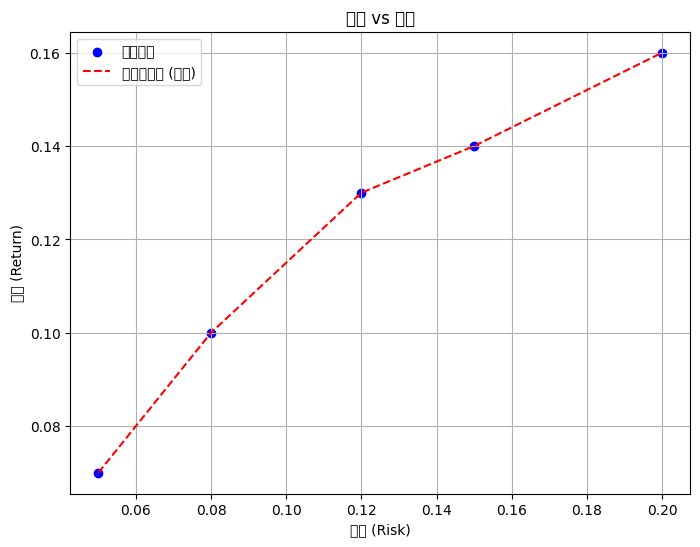


图表显示了投资组合的风险和收益之间的权衡。红色的虚线代表了理想情况下的帕累托前沿，线上任何一个点都代表着在不增加风险的前提下无法获得更高收益，或在不降低收益的前提下无法降低风险的投资组合。


In [ ]:
"""
5. 多目标优化 (Multi-Objective Optimization, MOO)
定义： 多目标优化涉及同时优化两个或多个相互冲突的目标函数。其目标是找到一组帕累托最优解，其中一个目标函数无法在不损害另一个目标函数的情况下得到改进。

示例： 投资组合优化。投资者希望最大化投资组合的收益，同时最小化风险。这两个目标通常是冲突的：高收益通常伴随着高风险。

代码实现： 这是一个概念性示例，因为真正的多目标优化通常涉及更复杂的算法（如 NSGA-II），这里我们将展示一个简化的帕累托前沿思想。
"""
import matplotlib.pyplot as plt

# 假设有几组投资组合的风险和收益数据
# 风险 (越低越好)
risks = [0.05, 0.08, 0.12, 0.15, 0.20]
# 收益 (越高越好)
returns = [0.07, 0.10, 0.13, 0.14, 0.16]

# 假设这些点已经代表了某种形式的帕累托前沿
# 实际中需要通过优化算法生成这些点

print("\n--- 多目标优化 (概念性示例 - 投资组合帕累托前沿) ---")
print("投资组合风险: ", risks)
print("投资组合收益: ", returns)

plt.figure(figsize=(8, 6))
plt.scatter(risks, returns, color='blue', label='投资组合')
plt.plot(risks, returns, color='red', linestyle='--', label='帕累托前沿 (示例)')
plt.title('风险 vs 收益')
plt.xlabel('风险 (Risk)')
plt.ylabel('收益 (Return)')
plt.grid(True)
plt.legend()
plt.show()

print("\n图表显示了投资组合的风险和收益之间的权衡。红色的虚线代表了理想情况下的帕累托前沿，线上任何一个点都代表着在不增加风险的前提下无法获得更高收益，或在不降低收益的前提下无法降低风险的投资组合。")


---

### 1.2.6 元启发式算法 (Metaheuristics)
**通用流程：**
1. 初始化种群/解。
2. 迭代更新（如交叉、变异、邻域搜索）。
3. 评估并选择新一代解。

**示例算法：**
- **遗传算法 (GA)**：选择-交叉-变异。
- **粒子群优化 (PSO)**：  
  速度更新公式：
  $$
  v_i^{k+1} = \omega v_i^k + c_1 r_1 (p_i^k - x_i^k) + c_2 r_2 (g^k - x_i^k).
  $$



--- 元启发算法 (遗传算法求解 TSP) ---
城市: ['A', 'B', 'C', 'D', 'E']
最佳路径: A -> B -> E -> D -> C -> A
最短总距离: 15.85


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20339 (\N{CJK UNIFIED IDEOGRAPH-4F73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  fig.canvas

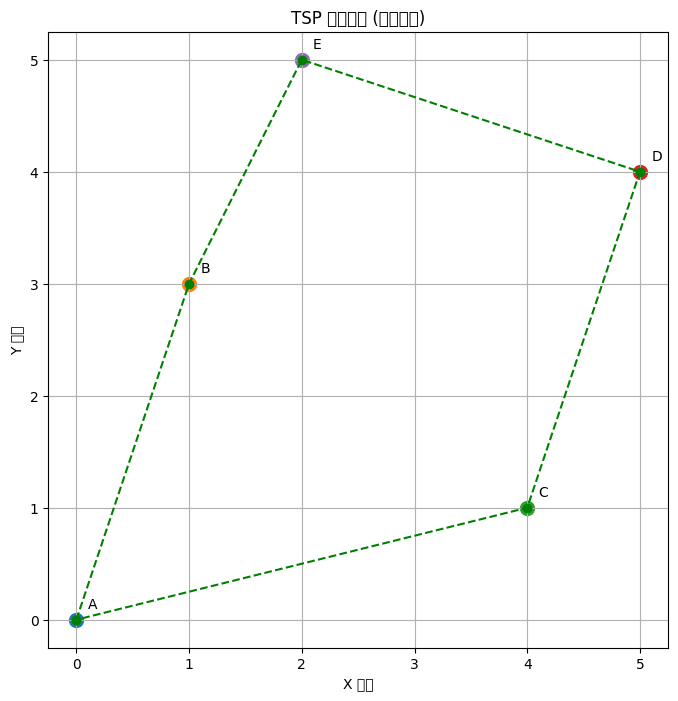

In [ ]:
"""
6. 元启发算法 (Metaheuristic Algorithms)
定义： 元启发算法是一类高层次的通用算法，通常用于解决复杂优化问题，特别是那些计算量大、难以用精确方法在合理时间内求解的问题。它们不保证找到最优解，但通常能找到非常接近最优解的良好解。常见的元启发算法包括遗传算法、模拟退火、粒子群优化、蚁群优化等。

示例： 旅行商问题 (Traveling Salesperson Problem, TSP)。一个旅行商需要访问一系列城市，每个城市只访问一次，并最终返回起点。目标是找到一条总行程最短的路径。这是一个 NP-hard 问题，对于大量城市，精确求解几乎不可能。

代码实现： 我们将使用一个简单的遗传算法来解决 TSP 问题。
"""
import random
import numpy as np
import matplotlib.pyplot as plt

# 城市坐标
cities = {
    'A': (0, 0), 'B': (1, 3), 'C': (4, 1), 'D': (5, 4), 'E': (2, 5)
}
city_names = list(cities.keys())
num_cities = len(city_names)

# 计算距离矩阵
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        city1_coords = cities[city_names[i]]
        city2_coords = cities[city_names[j]]
        distances[i, j] = np.sqrt((city1_coords[0] - city2_coords[0])**2 + (city1_coords[1] - city2_coords[1])**2)

# 遗传算法参数
POP_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.02
ELITE_SIZE = 10 # 精英保留的数量

# 适应度函数：路径长度的倒数
def calculate_fitness(path):
    total_distance = 0
    for i in range(num_cities):
        start_city_idx = path[i]
        end_city_idx = path[(i + 1) % num_cities] # 形成回路
        total_distance += distances[start_city_idx, end_city_idx]
    # 适应度是距离的倒数，因为我们想最小化距离
    return 1 / total_distance

# 初始化种群
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(range(num_cities)) # [0, 1, 2, ..., num_cities-1]
        random.shuffle(individual)
        population.append(individual)
    return population

# 选择 (锦标赛选择)
def selection(population, fitnesses, elite_size):
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), reverse=True)]
    return sorted_population[:elite_size]

# 交叉 (顺序交叉 Ox)
def crossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    start, end = sorted(random.sample(range(size), 2))

    # 复制一部分父代1
    child[start:end+1] = parent1[start:end+1]

    # 填充剩余部分，保持父代2的顺序
    current_pos = (end + 1) % size
    for gene in parent2:
        if gene not in child:
            while child[current_pos] != -1:
                current_pos = (current_pos + 1) % size
            child[current_pos] = gene
    return child

# 变异 (交换变异)
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# 遗传算法主循环
def genetic_algorithm_tsp():
    population = create_initial_population(POP_SIZE, num_cities)
    best_overall_path = None
    best_overall_fitness = 0

    for gen in range(GENERATIONS):
        fitnesses = [calculate_fitness(individual) for individual in population]
        current_best_fitness = max(fitnesses)
        current_best_path = population[fitnesses.index(current_best_fitness)]

        if current_best_fitness > best_overall_fitness:
            best_overall_fitness = current_best_fitness
            best_overall_path = current_best_path

        elite = selection(population, fitnesses, ELITE_SIZE)
        next_population = elite[:] # 精英直接进入下一代

        while len(next_population) < POP_SIZE:
            parent1 = random.choice(elite) # 从精英中选择父代
            parent2 = random.choice(elite)
            child = crossover(parent1, parent2)
            mutated_child = mutate(child, MUTATION_RATE)
            next_population.append(mutated_child)

        population = next_population

    return best_overall_path, 1 / best_overall_fitness # 返回实际距离

best_path_indices, min_distance = genetic_algorithm_tsp()

best_path_cities = [city_names[i] for i in best_path_indices]
best_path_cities.append(city_names[best_path_indices[0]]) # 回到起点

print("\n--- 元启发算法 (遗传算法求解 TSP) ---")
print(f"城市: {city_names}")
print(f"最佳路径: {' -> '.join(best_path_cities)}")
print(f"最短总距离: {min_distance:.2f}")

# 可视化路径
plt.figure(figsize=(8, 8))
for city, coords in cities.items():
    plt.scatter(coords[0], coords[1], s=100, label=city)
    plt.text(coords[0] + 0.1, coords[1] + 0.1, city)

# 绘制路径
path_coords = [cities[city_names[i]] for i in best_path_indices]
path_coords.append(cities[city_names[best_path_indices[0]]]) # 回到起点
path_x = [p[0] for p in path_coords]
path_y = [p[1] for p in path_coords]
plt.plot(path_x, path_y, linestyle='--', marker='o', color='green')

plt.title('TSP 最佳路径 (遗传算法)')
plt.xlabel('X 坐标')
plt.ylabel('Y 坐标')
plt.grid(True)
plt.show()

## 1.3 总结与联系
| **方法**               | **核心特征**                                                                 | **适用场景**                                                                 | **优势**                                      | **局限性**                                    | **典型算法/技术**                                                                 |
|------------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------------------------------------------|
| **线性规划 (LP)**       | - 目标函数与约束均为线性<br>- 决策变量连续<br>- 可行域为凸多面体                     | - 资源分配<br>- 运输问题<br>- 生产计划                                       | - 理论成熟，求解高效<br>- 全局最优解保证          | - 无法处理非线性关系或离散变量                  | - 单纯形法<br>- 内点法                                                           |
| **整数规划 (IP/MIP)**   | - 含整数变量约束<br>- 可行域为离散点集<br>- 分支定界法依赖LP松弛                     | - 设施选址<br>- 排班调度<br>- 组合优化（如TSP）                              | - 可建模离散逻辑<br>- 精确解                   | - NP-Hard问题，计算复杂度高                    | - 分支定界法<br>- 切割平面法<br>- 启发式（如Feasibility Pump）                    |
| **非线性规划 (NLP)**    | - 目标或约束非线性<br>- 可行域可能非凸<br>- 需处理局部最优                          | - 工程设计优化<br>- 参数估计<br>- 机器学习训练                                | - 建模能力强<br>- 凸问题时全局最优              | - 非凸问题难求解<br>- 依赖初始点                | - 梯度下降法<br>- SQP<br>- 内点法<br>- KKT条件分析                                |
| **动态规划 (DP)**       | - 多阶段决策问题<br>- 满足最优子结构<br>- 贝尔曼方程递归求解                        | - 最短路径问题<br>- 库存管理<br>- 强化学习                                   | - 全局最优策略<br>- 避免重复计算                | - 维数灾难<br>- 需精确状态转移模型              | - 值迭代<br>- 策略迭代<br>- 逆向归纳法                                             |
| **多目标优化 (MOO)**    | - 多个冲突目标<br>- Pareto最优解集<br>- 需权衡分析                              | - 工程设计权衡<br>- 投资组合优化<br>- 供应链多目标决策                        | - 全面反映现实需求<br>- 提供决策空间            | - 计算复杂度高<br>- 需后验决策                  | - 加权和法<br>- ε-约束法<br>- NSGA-II（进化算法）                                  |
| **元启发式算法**        | - 黑箱优化<br>- 探索与开采平衡<br>- 不保证最优性                                | - 大规模组合优化<br>- 复杂非凸问题<br>- 实时调度                              | - 通用性强<br>- 处理复杂约束                   | - 参数敏感<br>- 解质量不可控                    | - 遗传算法 (GA)<br>- 粒子群优化 (PSO)<br>- 模拟退火 (SA)              


#### 关键联系与选择策略：
1. **精确 vs. 启发式**  
   - 优先尝试LP/IP/NLP/DP（若问题规模允许）→ 保证最优性  
   - 大规模/复杂问题 → 元启发式或混合方法（如MIP+启发式）  

2. **方法融合**  
   - **LP松弛**为IP提供下界  
   - **NLP局部搜索**嵌入元启发式  
   - **DP思想**设计定制启发式  

3. **凸性至关重要**  
   - 凸问题：NLP/DP可高效求解全局最优  
   - 非凸问题：需依赖元启发式或多起点策略  


# 2.图论

## 2.1 图的基本概念

### 1. 图是什么？
图(Graph)是由**顶点(Vertex)**和**边(Edge)**组成的数学结构：
- **顶点**：表示实体（如城市、人物、任务）
- **边**：表示实体间的关系（如道路、关系、依赖）

```mermaid
graph LR
    A[顶点 A] -->|边| B[顶点 B]
    A --> C[顶点 C]
    B --> D[顶点 D]
    C --> D
```

### 2. 图的分类
| 类型 | 特点 | 示例 |
|------|------|------|
| **无向图** | 边没有方向 | 社交网络（好友关系） |
| **有向图** | 边有方向 | 网页链接（A页面链接到B页面） |
| **加权图** | 边有权重值 | 地图（道路长度） |
| **无权图** | 边无权重 | 组织结构图 |

### 3. 图的基本术语
- **度(Degree)**：与顶点相连的边数
- **路径(Path)**：顶点序列，其中每对相邻顶点由边连接
- **环(Cycle)**：起点和终点相同的路径
- **连通图(Connected Graph)**：任意两顶点间都有路径
- **子图(Subgraph)**：原图的一部分顶点和边

## 2.2 图表示法

### 1. 邻接矩阵
使用二维数组表示顶点间关系：
```
   A B C D
A  0 1 1 0
B  1 0 1 1
C  1 1 0 0
D  0 1 0 0
```

**特点**：
- 快速检查顶点间是否有边（O(1)）
- 空间复杂度高（O(V²)）
- 适合稠密图

### 2. 邻接表
使用字典或列表存储每个顶点的邻居：
```python
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B'],
    'D': ['B']
}
```

**特点**：
- 空间效率高（O(V+E)）
- 快速获取顶点的所有邻居
- 适合稀疏图

## 2.3 图的遍历算法



### 2.3.1. 深度优先搜索(DFS)
**原理**：尽可能深地探索图的分支，回溯后继续探索


In [ ]:
"""
1.1 深度优先搜索 (Depth-First Search, DFS)
定义： DFS 是一种用于遍历或搜索树或图的算法。它从根（或任意选择的起点）开始，沿着一条路径尽可能深入，直到不能再深入为止，然后回溯到最近的未访问过的节点，继续深入。

示例： 假设有一个社交网络，我们要找出从某个用户出发，他/她以及他/她的所有朋友的朋友（等等）都在哪些城市。DFS 可以帮助我们探索所有可达的用户。

图结构表示： 我们使用邻接列表来表示图。


"""

graph_dfs = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def dfs(graph, start_node, visited=None):
    if visited is None:
        visited = set()

    visited.add(start_node)
    print(start_node, end=" ") # 访问节点

    for neighbor in graph.get(start_node, []):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

print("--- 深度优先搜索 (DFS) ---")
print("图结构:", graph_dfs)
print("DFS 遍历从 'A' 开始:")
dfs(graph_dfs, 'A')
print("\n")

--- 深度优先搜索 (DFS) ---
图结构: {'A': ['B', 'C'], 'B': ['A', 'D', 'E'], 'C': ['A', 'F'], 'D': ['B'], 'E': ['B', 'F'], 'F': ['C', 'E']}
DFS 遍历从 'A' 开始:
A B D E F C 



**执行过程**：
```mermaid
graph TD
    A((A)) --> B((B))
    A --> C((C))
    B --> D((D))
    C --> E((E))
    
    classDef visited fill:#9f9,stroke:#333;
    classDef current fill:#f99,stroke:#333;
    
    class A current;
```

**应用场景**：
- 查找连通分量
- 检测图中是否有环
- 拓扑排序
- 解决迷宫问题


### 2.3.2. 广度优先搜索(BFS)
**原理**：逐层探索，先访问所有邻居再访问邻居的邻居


In [ ]:
"""
1.2 广度优先搜索 (Breadth-First Search, BFS)
定义： BFS 是一种用于遍历或搜索树或图的算法。它从根（或任意选择的起点）开始，首先访问所有直接邻居，然后是这些邻居的邻居，依此类推，一层一层地向外扩展。

示例： 假设我们要找出从一个城市到达另一个城市的最少航班次数（每条边代表一个航班）。BFS 可以找到最短路径（在边的数量上）。
"""

from collections import deque

graph_bfs = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)

    print("BFS 遍历从 'A' 开始:")
    while queue:
        current_node = queue.popleft()
        print(current_node, end=" ") # 访问节点

        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

print("\n--- 广度优先搜索 (BFS) ---")
print("图结构:", graph_bfs)
bfs(graph_bfs, 'A')
print("\n")

**执行过程**：
```mermaid
graph TD
    A((A)) --> B((B))
    A --> C((C))
    B --> D((D))
    C --> E((E))
    
    classDef visited fill:#9f9,stroke:#333;
    classDef current fill:#f99,stroke:#333;
    
    class A current;
```

**应用场景**：
- 查找最短路径（无权图）
- 社交网络中查找关系链
- 网络爬虫
- GPS导航系统


## 2.4 最短路径算法

### 2.4.1. Dijkstra算法
**原理**：贪心算法，每次选择当前最短路径的顶点

**关键点**：
- 仅适用于非负权重
- 使用优先队列提高效率
- 时间复杂度：O(E + V log V)

In [ ]:
"""
定义： Dijkstra 算法用于在具有非负边权的图中查找从单个源节点到所有其他节点的最短路径。它采用贪心策略。

示例： 假设你正在规划旅行路线，知道不同城市之间的驾驶时间（非负）。Dijkstra 可以找到从你当前城市到其他任何城市的最快路径。

图结构表示： 使用邻接列表，其中每个邻居是一个元组 (neighbor, weight)。
"""

import heapq

graph_dijkstra = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

def dijkstra(graph, start_node):
    # distances 存储从起点到每个节点的最短距离
    # 初始化为无穷大，起点为0
    distances = {node: float('infinity') for node in graph}
    distances[start_node] = 0

    # priority_queue 存储 (distance, node) 对，用于选择下一个要访问的节点
    priority_queue = [(0, start_node)] # (distance, node)

    print(f"\n--- Dijkstra 算法 (从 '{start_node}' 开始) ---")
    print("图结构:", graph_dijkstra)

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # 如果当前距离比已知的距离大，说明已经找到更短的路径，跳过
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.get(current_node, []):
            distance = current_distance + weight
            # 如果找到更短的路径
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

shortest_paths = dijkstra(graph_dijkstra, 'A')
print(f"从 'A' 到各节点的最短距离: {shortest_paths}")

### 2.4.2. Floyd-Warshall算法
**原理**：动态规划，逐步考虑所有顶点作为中间点

**关键点**：
- 适用于所有顶点对的最短路径
- 支持负权重（不能有负权环）
- 时间复杂度：O(V³)

In [ ]:
"""
定义： Floyd-Warshall 算法是一种多源最短路径算法，用于查找图中所有节点对之间的最短路径。它可以处理有负权边的图，但不能处理负权环。它基于动态规划。

示例： 在一个包含多个城市的高速公路网络中，你需要知道任意两个城市之间的最短驾驶距离。Floyd-Warshall 算法可以一次性计算出所有这些距离。

图结构表示： 使用邻接矩阵表示，其中 matrix[i][j] 是从节点 i 到节点 j 的边的权重。如果不存在边，则为无穷大。
"""

# 城市编号映射
nodes_floyd = ['A', 'B', 'C', 'D']
num_nodes_floyd = len(nodes_floyd)
INF = float('infinity')

# 邻接矩阵表示
# A B C D
# A 0 3 INF 7
# B 8 0 2 INF
# C 5 INF 0 1
# D 2 INF INF 0
adj_matrix_floyd = [
    [0, 3, INF, 7],
    [8, 0, 2, INF],
    [5, INF, 0, 1],
    [2, INF, INF, 0]
]

def floyd_warshall(graph_matrix):
    n = len(graph_matrix)
    # dist 矩阵初始化为邻接矩阵
    dist = [row[:] for row in graph_matrix]

    # k 是中间节点
    for k in range(n):
        # i 是起点
        for i in range(n):
            # j 是终点
            for j in range(n):
                # 如果通过 k 节点可以得到更短的路径
                if dist[i][k] != INF and dist[k][j] != INF:
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

print("\n--- Floyd-Warshall 算法 ---")
print("图结构 (邻接矩阵):")
for row in adj_matrix_floyd:
    print([round(x, 2) if x != INF else 'INF' for x in row])

all_pairs_shortest_paths = floyd_warshall(adj_matrix_floyd)

print("\n所有节点对之间的最短路径:")
for i in range(num_nodes_floyd):
    for j in range(num_nodes_floyd):
        val = all_pairs_shortest_paths[i][j]
        print(f"从 {nodes_floyd[i]} 到 {nodes_floyd[j]}: {round(val, 2) if val != INF else '不可达'}")
    print()


--- Floyd-Warshall 算法 ---
图结构 (邻接矩阵):
[0, 3, 'INF', 7]
[8, 0, 2, 'INF']
[5, 'INF', 0, 1]
[2, 'INF', 'INF', 0]

所有节点对之间的最短路径:
从 A 到 A: 0
从 A 到 B: 3
从 A 到 C: 5
从 A 到 D: 6

从 B 到 A: 5
从 B 到 B: 0
从 B 到 C: 2
从 B 到 D: 3

从 C 到 A: 3
从 C 到 B: 6
从 C 到 C: 0
从 C 到 D: 1

从 D 到 A: 2
从 D 到 B: 5
从 D 到 C: 7
从 D 到 D: 0



## 2.5 最小生成树算法

### 2.5.1. Prim算法
**原理**：从顶点出发，逐步扩展最小权重边


In [ ]:
"""
定义： Prim 算法是一种贪心算法，用于在加权连通无向图中查找最小生成树。它从一个任意节点开始，逐步添加连接已构建树与未包含节点的最短边。

示例： 假设你要在一个新开发区域铺设电缆，连接所有住宅区，并且目标是使用最少长度的电缆。Prim 算法可以帮你找到最优的布线方案。

图结构表示： 邻接列表，{node: [(neighbor, weight), ...]}。
"""

import heapq

graph_prim = {
    'A': [('B', 2), ('C', 3)],
    'B': [('A', 2), ('C', 4), ('D', 3)],
    'C': [('A', 3), ('B', 4), ('D', 5)],
    'D': [('B', 3), ('C', 5)]
}

def prim(graph, start_node):
    mst = [] # 存储最小生成树的边
    visited = set() # 存储已添加到MST的节点
    # priority_queue 存储 (weight, from_node, to_node)
    # 用于选择连接已访问节点到未访问节点的最短边
    min_heap = [(0, None, start_node)] # (cost, from_node, to_node)

    total_cost = 0

    print(f"\n--- Prim 算法 (从 '{start_node}' 开始) ---")
    print("图结构:", graph_prim)

    while min_heap and len(visited) < len(graph):
        cost, from_node, to_node = heapq.heappop(min_heap)

        if to_node in visited:
            continue

        visited.add(to_node)
        total_cost += cost
        if from_node is not None: # 起始节点没有来自的边
            mst.append((from_node, to_node, cost))

        for neighbor, weight in graph.get(to_node, []):
            if neighbor not in visited:
                heapq.heappush(min_heap, (weight, to_node, neighbor))

    return mst, total_cost

prim_mst_edges, prim_total_cost = prim(graph_prim, 'A')
print("最小生成树的边:")
for edge in prim_mst_edges:
    print(f"{edge[0]} --({edge[2]})-- {edge[1]}")
print(f"最小总成本: {prim_total_cost}")


--- Prim 算法 (从 'A' 开始) ---
图结构: {'A': [('B', 2), ('C', 3)], 'B': [('A', 2), ('C', 4), ('D', 3)], 'C': [('A', 3), ('B', 4), ('D', 5)], 'D': [('B', 3), ('C', 5)]}
最小生成树的边:
A --(2)-- B
A --(3)-- C
B --(3)-- D
最小总成本: 8


### 2.5.2. Kruskal算法
**原理**：按权重排序所有边，逐步添加不形成环的边


In [ ]:
"""
定义： Kruskal 算法也是一种贪心算法，用于在加权连通无向图中查找最小生成树。它通过按边权升序排序，然后依次添加边，只要该边不形成环，直到连接所有节点。它通常使用并查集（Disjoint Set Union, DSU）数据结构来检测环。

示例： 同 Prim 算法，如果需要连接所有区域且成本最低，Kruskal 算法也能实现。它更适合处理边列表形式的图。

图结构表示： 边列表，每条边是 (weight, u, v)。
"""

class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n # 用于优化 union 操作（按秩合并）

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i]) # 路径压缩
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            # 按秩合并
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True
        return False # 形成环

# 边的列表 (weight, u, v)
# 假设节点用数字 0, 1, 2, 3... 表示
# A=0, B=1, C=2, D=3
edges_kruskal = [
    (2, 0, 1), # A-B
    (3, 0, 2), # A-C
    (4, 1, 2), # B-C
    (3, 1, 3), # B-D
    (5, 2, 3)  # C-D
]
# 节点映射
node_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
reverse_node_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
num_nodes_kruskal = len(node_map)

def kruskal(edges, num_nodes):
    mst = []
    total_cost = 0
    ds = DisjointSet(num_nodes)

    # 按权重升序排序边
    edges.sort()

    print("\n--- Kruskal 算法 ---")
    print("所有边 (权重, 源节点, 目标节点):", edges)

    for weight, u_idx, v_idx in edges:
        # 如果添加这条边不会形成环
        if ds.union(u_idx, v_idx):
            mst.append((reverse_node_map[u_idx], reverse_node_map[v_idx], weight))
            total_cost += weight
            if len(mst) == num_nodes - 1: # 找到n-1条边即可
                break
    return mst, total_cost

kruskal_mst_edges, kruskal_total_cost = kruskal(edges_kruskal, num_nodes_kruskal)
print("最小生成树的边:")
for edge in kruskal_mst_edges:
    print(f"{edge[0]} --({edge[2]})-- {edge[1]}")
print(f"最小总成本: {kruskal_total_cost}")


--- Kruskal 算法 ---
所有边 (权重, 源节点, 目标节点): [(2, 0, 1), (3, 0, 2), (3, 1, 3), (4, 1, 2), (5, 2, 3)]
最小生成树的边:
A --(2)-- B
A --(3)-- C
B --(3)-- D
最小总成本: 8


## 2.6 算法复杂度总结

| 算法 | 时间复杂度 | 空间复杂度 | 适用场景 |
|------|------------|------------|----------|
| DFS/BFS | O(V+E) | O(V) | 图遍历、连通性检测 |
| Dijkstra | O(E + V log V) | O(V) | 单源最短路径（非负权）|
| Floyd-Warshall | O(V³) | O(V²) | 所有顶点对最短路径 |
| Prim | O(E log V) | O(V+E) | 最小生成树 |
| Kruskal | O(E log E) | O(V) | 最小生成树 |


## 3.实战

题目：方形件组批优化问题



### 3.1 问题一思路

需要最大化使用率，即：应该如何规划切割方法，使得最终使用的原片最少。

例如数据集A1，有700多个产品项，如何组合能够消耗的板材最少。

**排布规则：**
- 先在左下角放入一个产品项，然后观察下一个产品项的长/宽是否与其一致，一致的放上面，不一致的放左边。
- 每一列即一个栈，直到把长排满，形成一个条带。
- 进入下一个条带，重复步骤，进入下一个条带直到把宽排满。

**优化思路：**

- 对产品项进行编码1-700，一共有700!种编码方法，每种方法都按照规则进行排布。
- 使用遗传算法，初始化种群，随机生成一些编码，得到fitness（消耗板材数），筛选出其中表现好的编码顺序（父辈），使其交叉 变异，得到新的编码顺序（子代）。重复该步骤，训练找到最佳编码顺序。



### 3.2 优化的问题一思路

对700多个产品项进行不重复的编码并且寻找最佳编码顺序，需要700!次迭代计算，计算复杂度太高。模型跑不出来，需要针对该问题进行更深入的优化来降低计算复杂度。

**更新的排布规则：**

- 将大小完全相同的产品项，或者长款一致的产品项（相似）进行分组。
- 左下角放入第一个产品项后，先在上方叠加完全相同的产品项直至无法叠加。此时形成一个栈
- 紧贴第一个栈，继续放入相同/相似产品项。重复步骤形成第二个栈
- 直至原片长度不够，形成第一个条带。在条带上方累加直至形成第二个条带...

**更新的遗传算法：**

- 将栈进行编码，大约100多个栈。与初步遗传思路一致

**剩余优化空间：**

1. 相同和相似的产品项应该如何组合
2. 产品项可以旋转，例如1号的长=2号的宽，这部分是否需要拎出来单独考虑。
3. 精确的优化算法可以在精度上做更多的控制，但效率不高，是否有其他降低效率的方法。

### 3.3问题二思路
